# Emily Tseng (et397) HW2

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

## 1A) Logistic Regression / Challenger data I

In [3]:
# success and failure temps
S = np.array([66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76])
F = np.array([70, 57, 63, 70, 53, 75, 58])

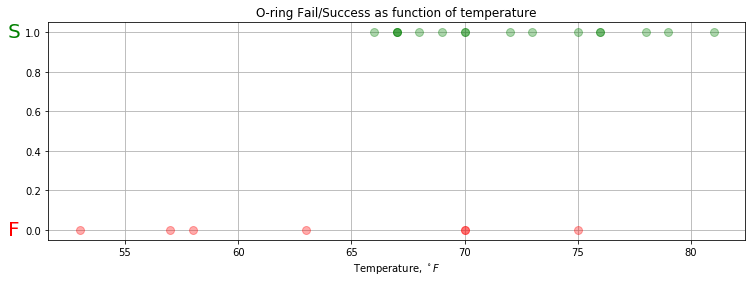

In [4]:
#first plot the data
plt.figure(figsize=(12.5, 4))
plt.yticks(np.arange(0,1.01,.2))
plt.plot(S, np.ones(len(S)), 'go',
         F, np.zeros(len(F)), 'ro', alpha=.33, markersize=8)
plt.xlabel("Temperature, ${}^\circ F$")
plt.text(-.04,.93,'S', transform=plt.gca().transAxes, fontsize=20, c='g', ha='right')
plt.text(-.04,.02,'F', transform=plt.gca().transAxes, fontsize=20, c='r', ha='right')
plt.ylim(-.05,1.05)
plt.grid('on')
plt.title('O-ring Fail/Success as function of temperature');

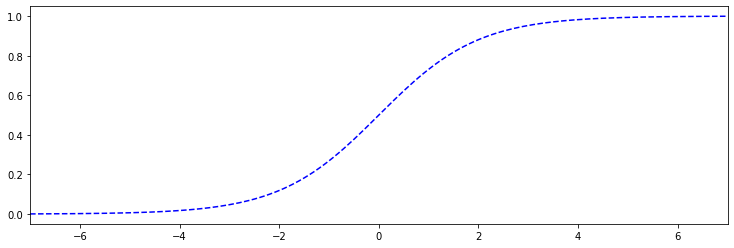

In [5]:
def logistic(t, a=1., t0=0.): return 1./(1.+np.exp(-a*(t-t0)))

plt.figure(figsize=(12.5, 4))
plt.xlim(-7,7)
xr=np.arange(-7.,7.1,.1)
plt.plot(xr,logistic(xr),'b--');

In [6]:
def objective(a, t0, S, F):
    logprob = np.log(logistic(S, a, t0)).sum() + np.log(1-logistic(F, a, t0)).sum()
    return np.exp(logprob)  

### i) Find the optimal values of a and t0, maximizing the probability of the data.

In [7]:
max_prob_a = 0.
max_prob_t0 = 0. 
max_prob = 0.
for a in np.arange(.01,1.,.01):
    for t0 in np.arange(50,85.001,.5):
        p = objective(a, t0, S, F)
        if p > max_prob:
            max_prob = p
            max_prob_a = a
            max_prob_t0 = t0
print('brute force optimization found optimal a={}, t0={}; max_prob={}'.format(max_prob_a, max_prob_t0, max_prob))            

brute force optimization found optimal a=0.24000000000000002, t0=65.0; max_prob=3.864403744170391e-05


### ii) Plot the resulting logistic function on the same graph as the data.

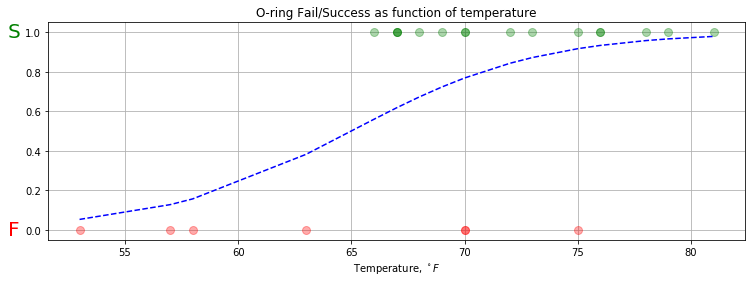

In [8]:
plt.figure(figsize=(12.5, 4))
plt.plot(S, np.ones(len(S)), 'go', F, np.zeros(len(F)), 'ro', alpha=.33, markersize=8)

ts = np.sort(np.concatenate((S, F)))
plt.plot(ts, logistic(ts, a=max_prob_a, t0=max_prob_t0),'b--');

plt.yticks(np.arange(0,1.01,.2))
plt.xlabel("Temperature, ${}^\circ F$")
plt.text(-.04,.93,'S', transform=plt.gca().transAxes, fontsize=20, c='g', ha='right')
plt.text(-.04,.02,'F', transform=plt.gca().transAxes, fontsize=20, c='r', ha='right')
plt.ylim(-.05,1.05)
plt.grid('on')
plt.title('O-ring Fail/Success as function of temperature');

### iii) What is the probability of failure at t=31 for these values of a and t0?

In [9]:
1 - logistic(31, a=max_prob_a, t0=max_prob_t0)

0.9997142192991582

## 1B) Draw a contour plot of the overall probability of the data for all values of t0, a

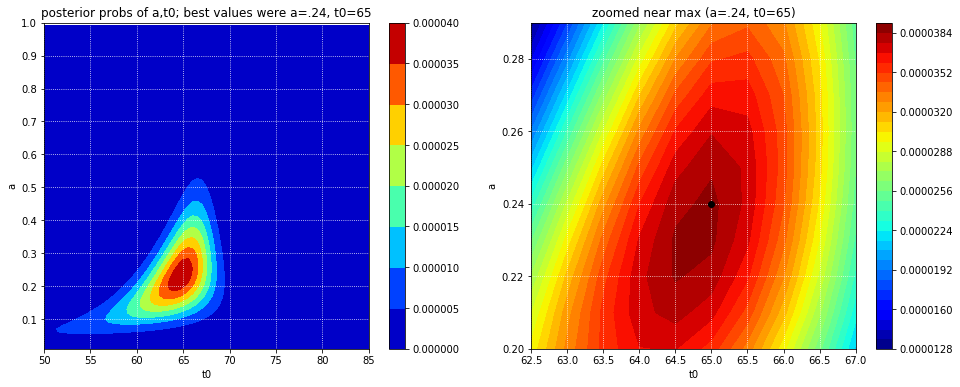

In [18]:
from scipy.stats import norm
t0r = np.arange(50,85.001,.5)
ar = np.arange(.01,1.,.01)
ts = np.sort(np.concatenate((S, F)))
# fakeprobs = np.array([[.01*norm.pdf(np.sqrt(.3*t**2 + 125*a**2 + 10*t*a)) #fake function
#                         for t in t0r-60] for a in ar-.5])         #peaked at t0=60, a=.5
probs = np.array([[objective(a, t0, S, F) for t0 in t0r] for a in ar])

#look directly at the overall probability of the data for all values of t0, a
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.contourf(t0r, ar, probs, cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('posterior probs of a,t0; best values were a=.24, t0=65')
plt.xlabel('t0'), plt.ylabel('a')
plt.yticks(np.arange(.1,1.1,.1));
plt.colorbar()

plt.subplot(1,2,2)
t0min = list(t0r).index(62.5)
t0max = list(t0r).index(67.5)
amin = list(ar).index(0.2)
amax = list(ar).index(0.3)
plt.contourf(t0r[t0min:t0max], ar[amin:amax], probs[amin:amax,t0min:t0max], levels=40, cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('zoomed near max (a=.24, t0=65)')
plt.plot(65,.24,'ok')
plt.xlabel('t0'), plt.ylabel('a')
plt.colorbar();

## 2) Logistic Regression / Challenger data II

### A) Redo the fit of the logistic parameters from problem 1) using sklearn

In [10]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.array()